# 🔹 UFC Model Experiments

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Import Libraries and Setup Environment

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 200) 

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root))
from src.metrics import *
from src.model_factory import model_factory
from src.model import UFCModel
from src.data import UFCData
from src.config import *
from src.io_model import load_data, load_all_models
from src.helpers import *

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Load Data

In [2]:
# Load UFCData
try:
    ufc_data = load_data(name='ufc_data')
    ufc_data_no_odds = load_data(name='ufc_data_no_odds')
except Exception as e:
    logger.error(f"❌ Error loading training data: {e}")

INFO:src.io_model:📦 UFCData object loaded from: /home/mlioi/ufc-predictor/data/processed/ufc_data.pkl
INFO:src.io_model:📦 UFCData object loaded from: /home/mlioi/ufc-predictor/data/processed/ufc_data_no_odds.pkl


In [3]:
ufc_data

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6001
🧪 Train/Test split  : 4800 / 1201
🧪 Total features     : 28

🔢 Numerical features : 25
🔠 Categorical features: 3
    - Binary          : 2
    - Multiclass      : 1

🏷 Label distribution (raw):
   - Class 0: 3484 (58.1%)
   - Class 1: 2517 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                        mean      std      min       max
BlueTotalTitleBouts    0.260    1.111     0.00    16.000
RedTotalTitleBouts     0.572    1.574     0.00    16.000
LoseStreakDif          0.059    1.012    -6.00     6.000
WinStreakDif          -0.162    1.921   -18.00    10.000
LongestWinStreakDif   -0.772    2.053   -12.00    14.000
KODif                 -0.536    2.181   -21.00    14.000
SubDif                -0.334    1.877   -15.00    10.000
HeightDif             -0.030    6.286   -33.02    30.480
ReachDif              -0.260    8.266   -33.02    30.480
AgeDif            

In [4]:
ufc_data_no_odds

📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6001
🧪 Train/Test split  : 4800 / 1201
🧪 Total features     : 27

🔢 Numerical features : 24
🔠 Categorical features: 3
    - Binary          : 2
    - Multiclass      : 1

🏷 Label distribution (raw):
   - Class 0: 3484 (58.1%)
   - Class 1: 2517 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                      mean     std     min      max
BlueTotalTitleBouts  0.260   1.111    0.00   16.000
RedTotalTitleBouts   0.572   1.574    0.00   16.000
LoseStreakDif        0.059   1.012   -6.00    6.000
WinStreakDif        -0.162   1.921  -18.00   10.000
LongestWinStreakDif -0.772   2.053  -12.00   14.000
KODif               -0.536   2.181  -21.00   14.000
SubDif              -0.334   1.877  -15.00   10.000
HeightDif           -0.030   6.286  -33.02   30.480
ReachDif            -0.260   8.266  -33.02   30.480
AgeDif              -0.611   5.181  -17.00   16.000
SigStrDif       

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Load Models

In [5]:
model_list = load_all_models()

INFO:src.io_model:📦 Model 'Logistic Regression' loaded from: /home/mlioi/ufc-predictor/models/lr_best.pkl
INFO:src.io_model:📦 Model 'Logistic Regression' loaded from: /home/mlioi/ufc-predictor/models/lr_best_no_odds.pkl
INFO:src.io_model:📦 Model 'Random Forest' loaded from: /home/mlioi/ufc-predictor/models/rf_best.pkl
INFO:src.io_model:📦 Model 'Random Forest' loaded from: /home/mlioi/ufc-predictor/models/rf_best_no_odds.pkl
INFO:src.io_model:📦 Model 'Support Vector Machine' loaded from: /home/mlioi/ufc-predictor/models/svm_best.pkl
INFO:src.io_model:📦 Model 'Support Vector Machine' loaded from: /home/mlioi/ufc-predictor/models/svm_best_no_odds.pkl
INFO:src.io_model:📦 Model 'K-Nearest Neighbors' loaded from: /home/mlioi/ufc-predictor/models/knn_best.pkl
INFO:src.io_model:📦 Model 'K-Nearest Neighbors' loaded from: /home/mlioi/ufc-predictor/models/knn_best_no_odds.pkl
INFO:src.io_model:📦 Model 'AdaBoost' loaded from: /home/mlioi/ufc-predictor/models/ab_best.pkl
INFO:src.io_model:📦 Model '

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

# Evaluate Models

In [6]:
models_with_odds = [m for m in model_list if not m.is_no_odds]
models_no_odds = [m for m in model_list if m.is_no_odds]

# Evaluate metrics for WITH ODDS
for model in models_with_odds:
    model.metrics = evaluate_metrics(model, ufc_data)
    model.cm = evaluate_cm(model, ufc_data)

# Evaluate metrics for NO ODDS
for model in models_no_odds:
    model.metrics = evaluate_metrics(model, ufc_data_no_odds)
    model.cm = evaluate_cm(model, ufc_data_no_odds)

# Check Models

## Metrics Comparison

In [7]:
# Compare metrics WITH ODDS
metrics_with_odds = compare_metrics(models_with_odds)
display(metrics_with_odds)

INFO:src.metrics:🔍 Starting comparison of models...
INFO:src.metrics:Evaluating model: Logistic Regression
INFO:src.metrics:Evaluating model: Random Forest
INFO:src.metrics:Evaluating model: Support Vector Machine
INFO:src.metrics:Evaluating model: K-Nearest Neighbors
INFO:src.metrics:Evaluating model: AdaBoost
INFO:src.metrics:Evaluating model: Naive Bayes
INFO:src.metrics:Evaluating model: Extra Trees
INFO:src.metrics:Evaluating model: Gradient Boosting
INFO:src.metrics:Evaluating model: Quadratic Discriminant Analysis
INFO:src.metrics:Evaluating model: Neural Network
INFO:src.metrics:Evaluating model: XGBoost
INFO:src.metrics:✅ Comparison completed.


Accuracy  Precision  Recall  F1 Score  \
Model                                                                    
Logistic Regression                0.6611     0.6125  0.5238    0.5647   
Random Forest                      0.6694     0.6375  0.4921    0.5554   
Support Vector Machine             0.6628     0.6128  0.5337    0.5705   
K-Nearest Neighbors                0.6278     0.5733  0.4425    0.4994   
AdaBoost                           0.6553     0.6264  0.4425    0.5186   
Naive Bayes                        0.6170     0.5358  0.6528    0.5886   
Extra Trees                        0.6395     0.5983  0.4286    0.4994   
Gradient Boosting                  0.6603     0.6212  0.4881    0.5467   
Quadratic Discriminant Analysis    0.6611     0.6075  0.5437    0.5738   
Neural Network                     0.6536     0.5887  0.5794    0.5840   
XGBoost                            0.6578     0.6189  0.4802    0.5408   

                                 ROC AUC  Brier Score  
Model                                                  
Logistic Regression               0.7051       0.2135  
Random Forest                     0.7094       0.2132  
Support Vector Machine            0.7096       0.2124  
K-Nearest Neighbors               0.6377       0.2334  
AdaBoost                          0.7102       0.2126  
Naive Bayes                       0.6618       0.2568  
Extra Trees                       0.6584       0.2265  
Gradient Boosting                 0.7070       0.2121  
Quadratic Discriminant Analysis   0.6976       0.2204  
Neural Network                    0.6968       0.2172  
XGBoost                           0.7068       0.2122

In [8]:
# Compare metrics NO ODDS
metrics_no_odds = compare_metrics(models_no_odds)
display(metrics_no_odds)

INFO:src.metrics:🔍 Starting comparison of models...
INFO:src.metrics:Evaluating model: Logistic Regression (no_odds)
INFO:src.metrics:Evaluating model: Random Forest (no_odds)
INFO:src.metrics:Evaluating model: Support Vector Machine (no_odds)
INFO:src.metrics:Evaluating model: K-Nearest Neighbors (no_odds)
INFO:src.metrics:Evaluating model: AdaBoost (no_odds)
INFO:src.metrics:Evaluating model: Naive Bayes (no_odds)
INFO:src.metrics:Evaluating model: Extra Trees (no_odds)
INFO:src.metrics:Evaluating model: Gradient Boosting (no_odds)
INFO:src.metrics:Evaluating model: Quadratic Discriminant Analysis (no_odds)
INFO:src.metrics:Evaluating model: Neural Network (no_odds)
INFO:src.metrics:Evaluating model: XGBoost (no_odds)
INFO:src.metrics:✅ Comparison completed.


Accuracy  Precision  Recall  \
Model                                                                    
Logistic Regression (no_odds)                0.6303     0.6034  0.3472   
Random Forest (no_odds)                      0.6170     0.5873  0.2937   
Support Vector Machine (no_odds)             0.6286     0.6436  0.2579   
K-Nearest Neighbors (no_odds)                0.5720     0.4826  0.2758   
AdaBoost (no_odds)                           0.6078     0.5613  0.2996   
Naive Bayes (no_odds)                        0.5554     0.4768  0.6111   
Extra Trees (no_odds)                        0.6053     0.5573  0.2897   
Gradient Boosting (no_odds)                  0.6053     0.5581  0.2857   
Quadratic Discriminant Analysis (no_odds)    0.6236     0.5684  0.4286   
Neural Network (no_odds)                     0.6187     0.6917  0.1647   
XGBoost (no_odds)                            0.6095     0.5726  0.2738   

                                           F1 Score  ROC AUC  Brier Score  
Model                                                                      
Logistic Regression (no_odds)                0.4408   0.6300       0.2295  
Random Forest (no_odds)                      0.3915   0.6240       0.2318  
Support Vector Machine (no_odds)             0.3683   0.6275       0.2300  
K-Nearest Neighbors (no_odds)                0.3510   0.5525       0.2550  
AdaBoost (no_odds)                           0.3907   0.6106       0.2345  
Naive Bayes (no_odds)                        0.5357   0.6003       0.2694  
Extra Trees (no_odds)                        0.3812   0.5878       0.2378  
Gradient Boosting (no_odds)                  0.3780   0.6255       0.2310  
Quadratic Discriminant Analysis (no_odds)    0.4887   0.6351       0.2313  
Neural Network (no_odds)                     0.2660   0.6334       0.2355  
XGBoost (no_odds)                            0.3705   0.6253       0.2316

## Best Model per Metric

In [9]:
# Best models WITH ODDS
best_with_odds = best_model_per_metric(metrics_with_odds)
display(best_with_odds)

INFO:src.metrics:🏅 Best model for Accuracy: Random Forest (0.6694)
INFO:src.metrics:🏅 Best model for Precision: Random Forest (0.6375)
INFO:src.metrics:🏅 Best model for Recall: Naive Bayes (0.6528)
INFO:src.metrics:🏅 Best model for F1 Score: Naive Bayes (0.5886)
INFO:src.metrics:🏅 Best model for ROC AUC: AdaBoost (0.7102)
INFO:src.metrics:🏅 Best model for Brier Score: Gradient Boosting (0.2121)


Metric         Best Model   Value
0     Accuracy      Random Forest  0.6694
1    Precision      Random Forest  0.6375
2       Recall        Naive Bayes  0.6528
3     F1 Score        Naive Bayes  0.5886
4      ROC AUC           AdaBoost  0.7102
5  Brier Score  Gradient Boosting  0.2121

In [10]:
# Best models NO ODDS
best_no_odds = best_model_per_metric(metrics_no_odds)
display(best_no_odds)

INFO:src.metrics:🏅 Best model for Accuracy: Logistic Regression (no_odds) (0.6303)
INFO:src.metrics:🏅 Best model for Precision: Neural Network (no_odds) (0.6917)
INFO:src.metrics:🏅 Best model for Recall: Naive Bayes (no_odds) (0.6111)
INFO:src.metrics:🏅 Best model for F1 Score: Naive Bayes (no_odds) (0.5357)
INFO:src.metrics:🏅 Best model for ROC AUC: Quadratic Discriminant Analysis (no_odds) (0.6351)
INFO:src.metrics:🏅 Best model for Brier Score: Logistic Regression (no_odds) (0.2295)


Metric                                 Best Model   Value
0     Accuracy              Logistic Regression (no_odds)  0.6303
1    Precision                   Neural Network (no_odds)  0.6917
2       Recall                      Naive Bayes (no_odds)  0.6111
3     F1 Score                      Naive Bayes (no_odds)  0.5357
4      ROC AUC  Quadratic Discriminant Analysis (no_odds)  0.6351
5  Brier Score              Logistic Regression (no_odds)  0.2295

## Feature Importance

In [11]:
feature_names_with_odds = ufc_data.get_processed_train()[0].columns.tolist()
feature_names_no_odds = ufc_data_no_odds.get_processed_train()[0].columns.tolist()

INFO:src.model:✅ Plot saved to: /home/mlioi/ufc-predictor/img/Noise-based-feature-selection-part6


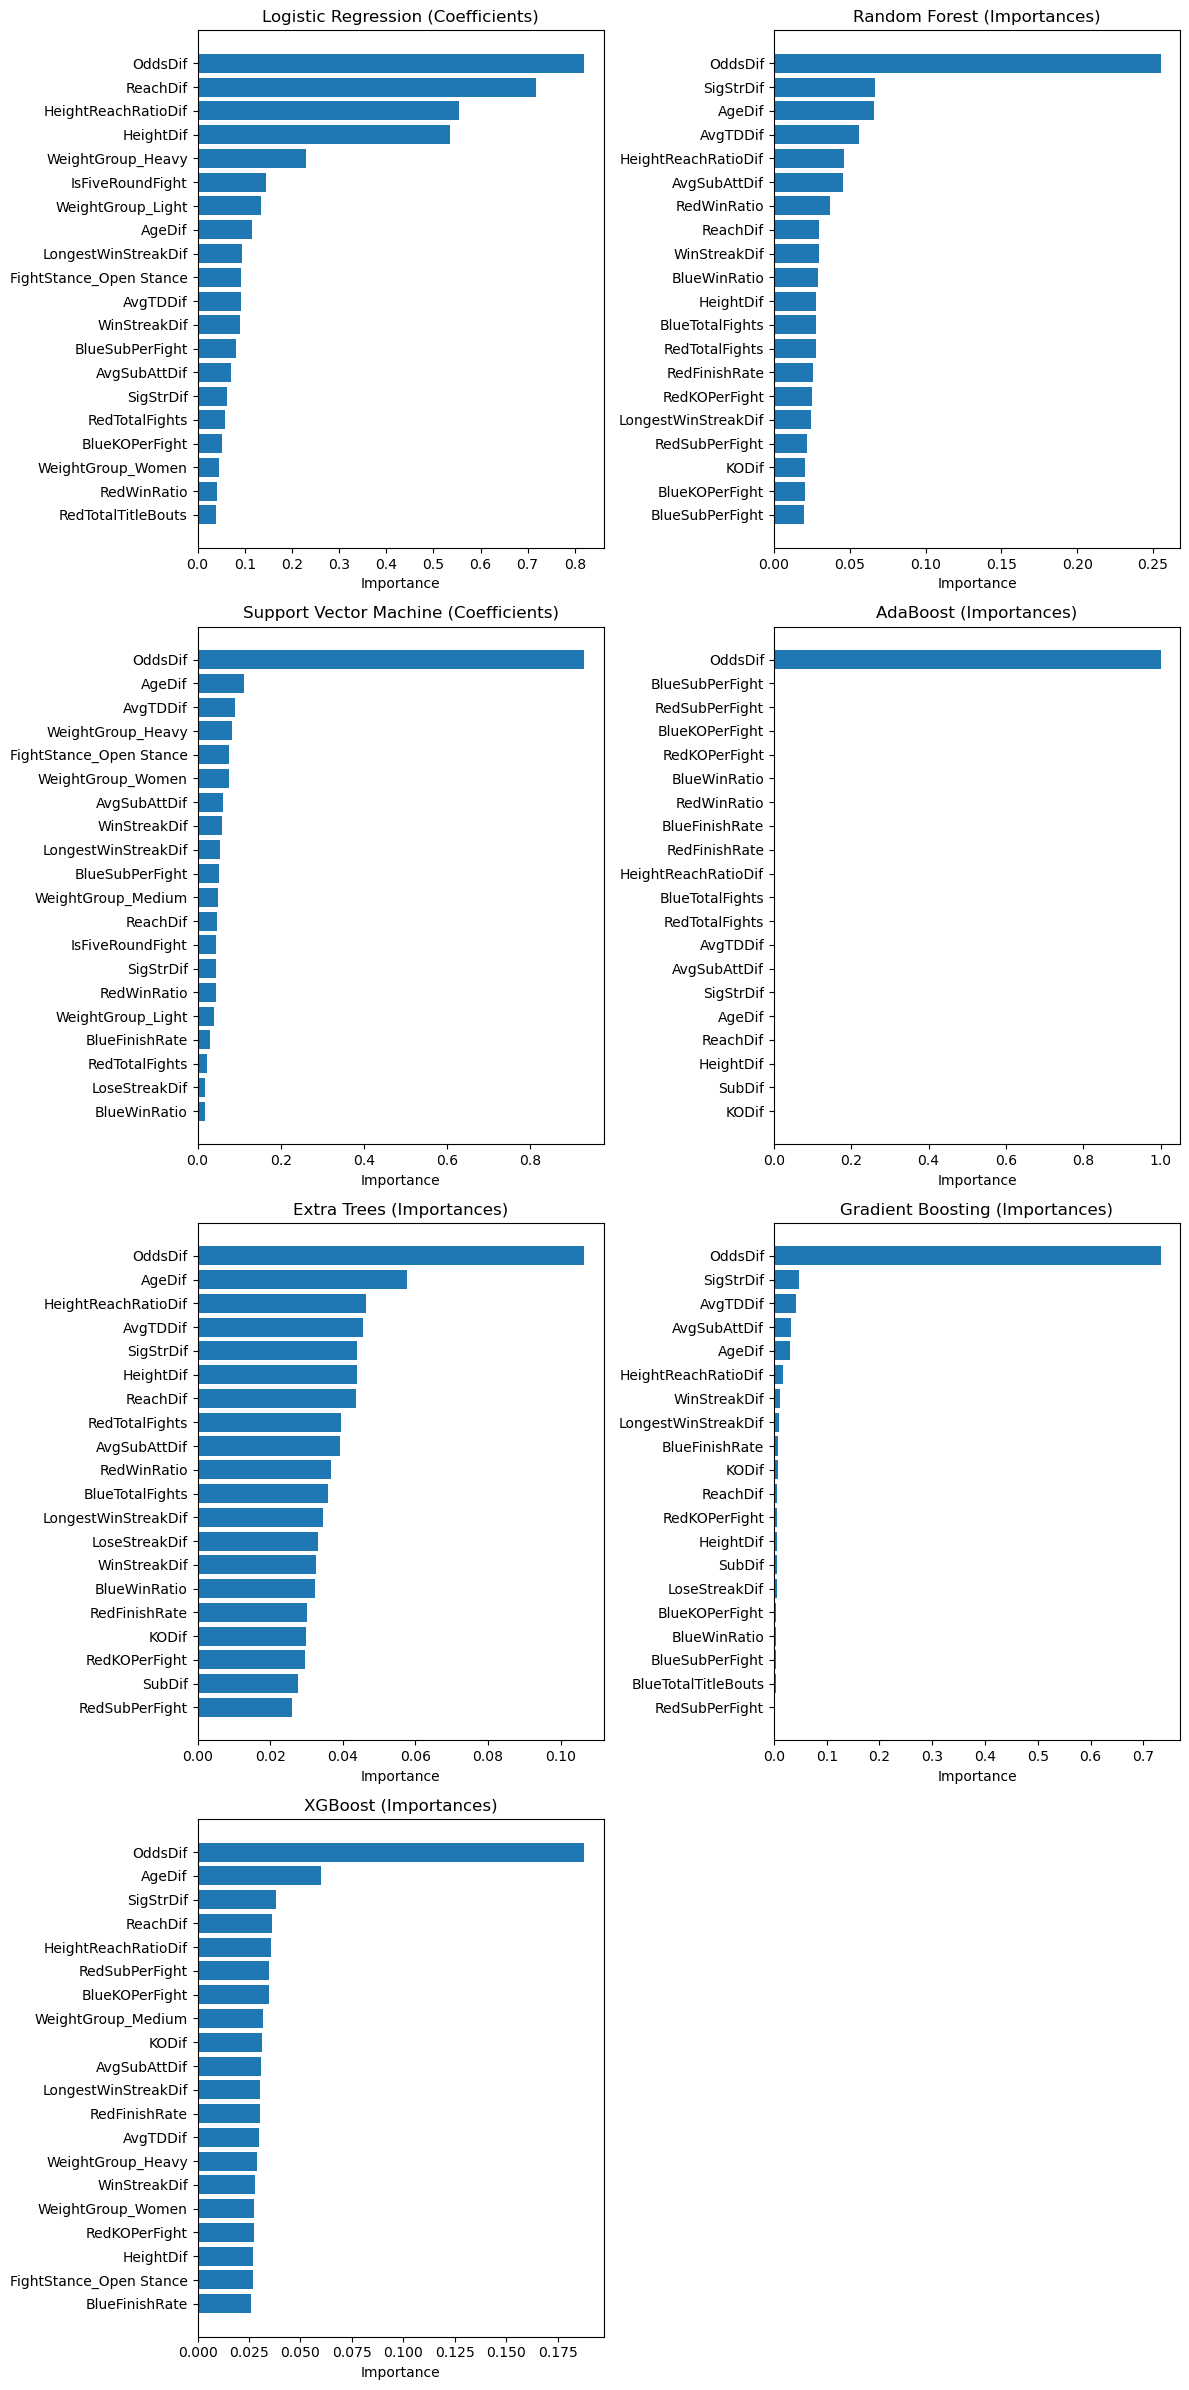

In [12]:
UFCModel.plot_feature_importances_grid(
    models_with_odds,
    feature_names=feature_names_with_odds,
    save_file=True,
    filename='Noise-based-feature-selection-part6'
)

INFO:src.model:✅ Plot saved to: /home/mlioi/ufc-predictor/img/Feature-importance-no-odds-part2


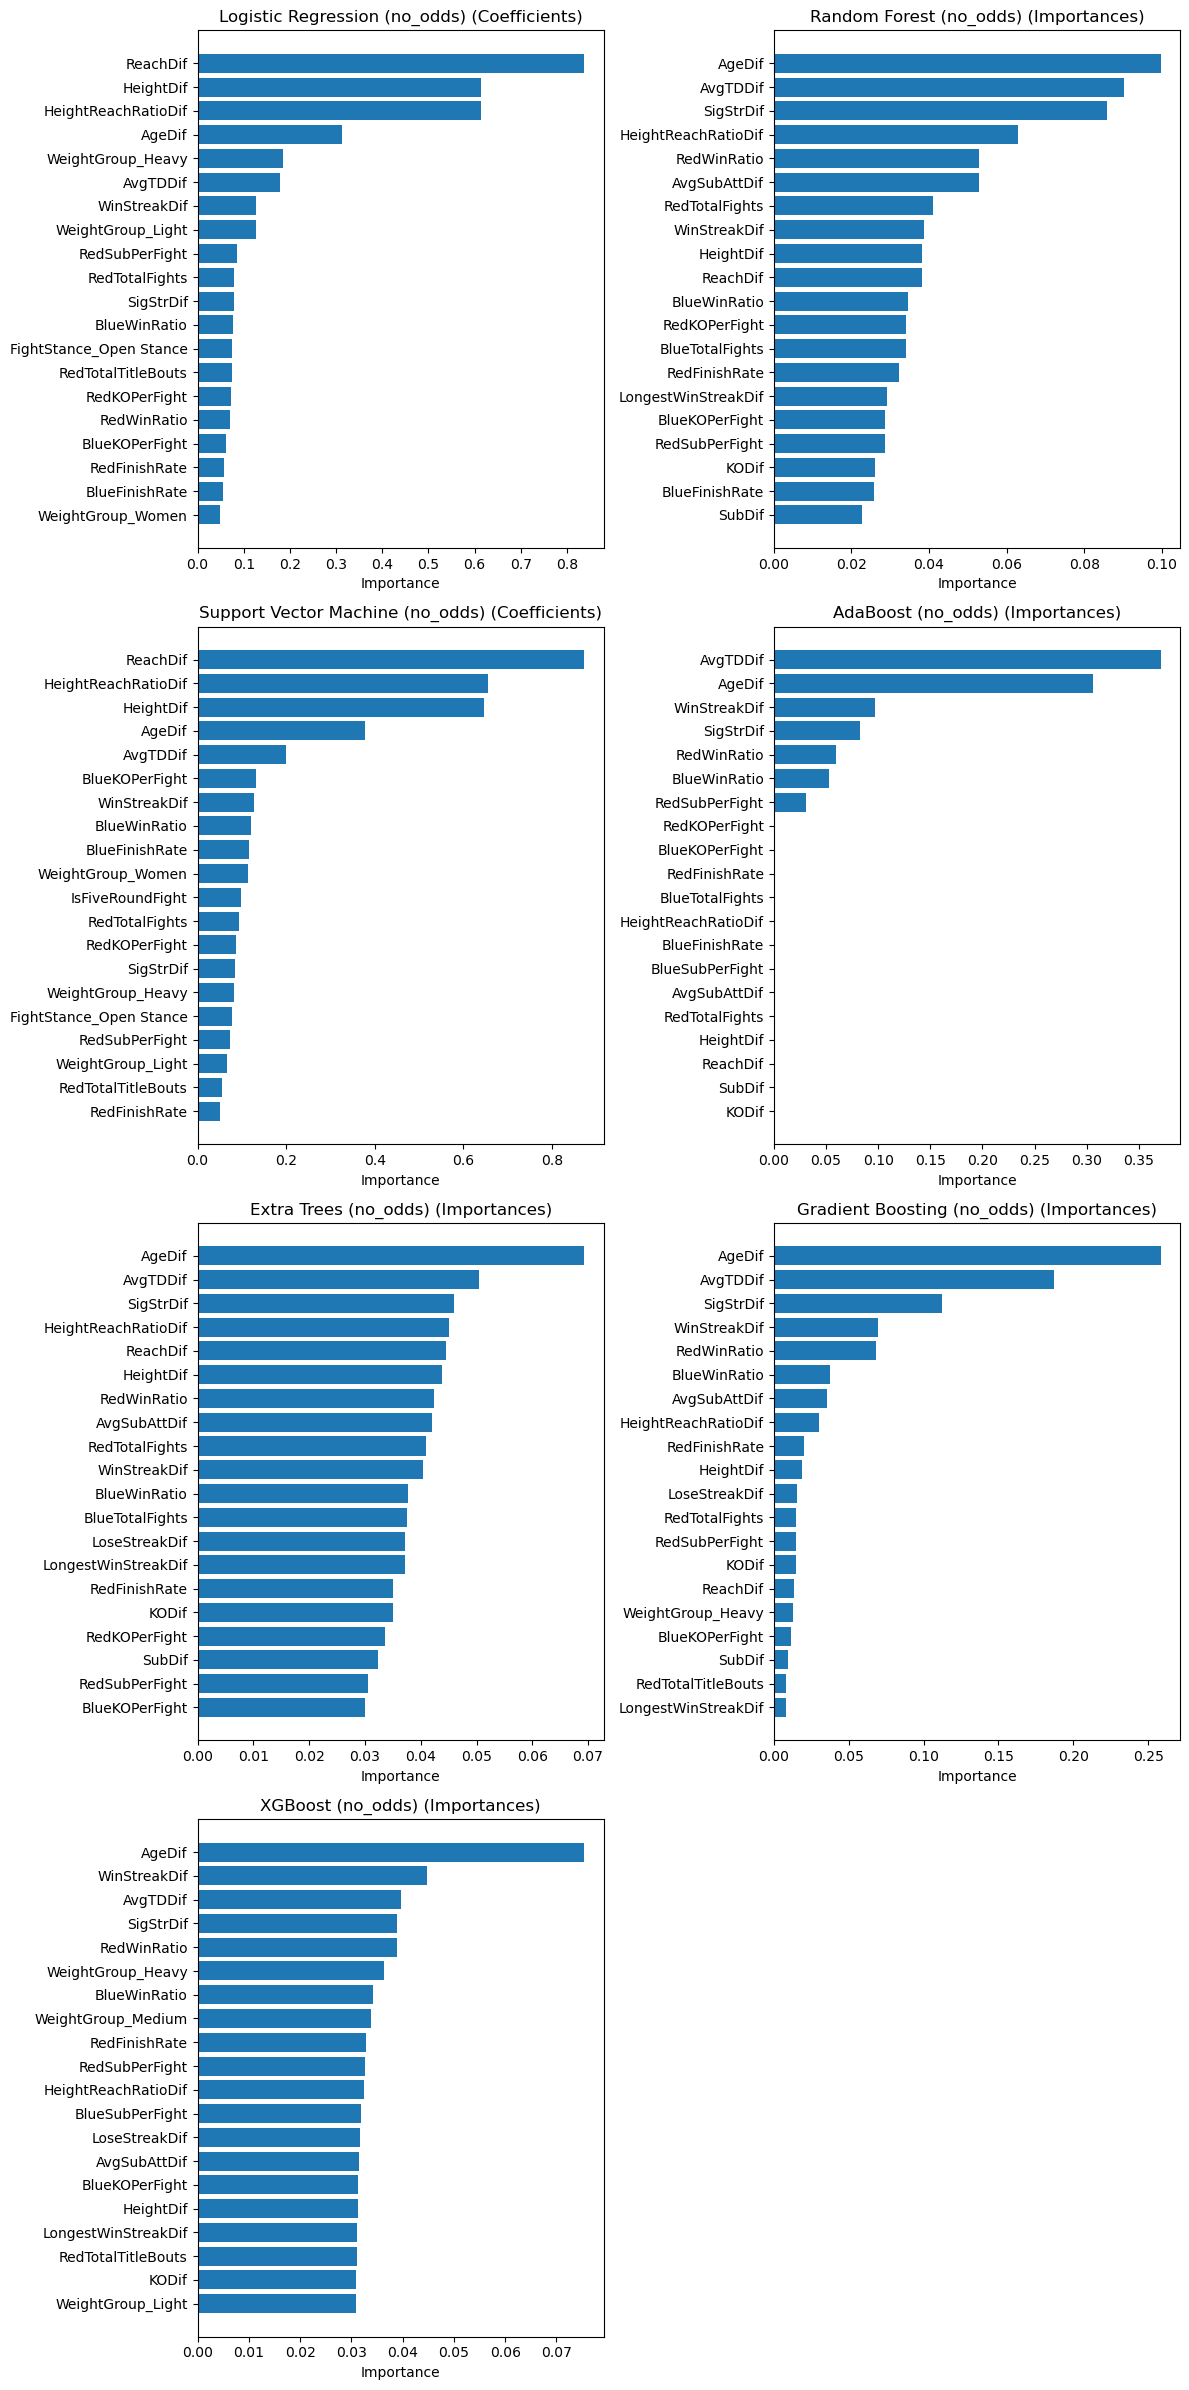

In [13]:
UFCModel.plot_feature_importances_grid(
    models_no_odds,
    feature_names=feature_names_no_odds,
    save_file=True,
    filename='Feature-importance-no-odds-part2'
)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

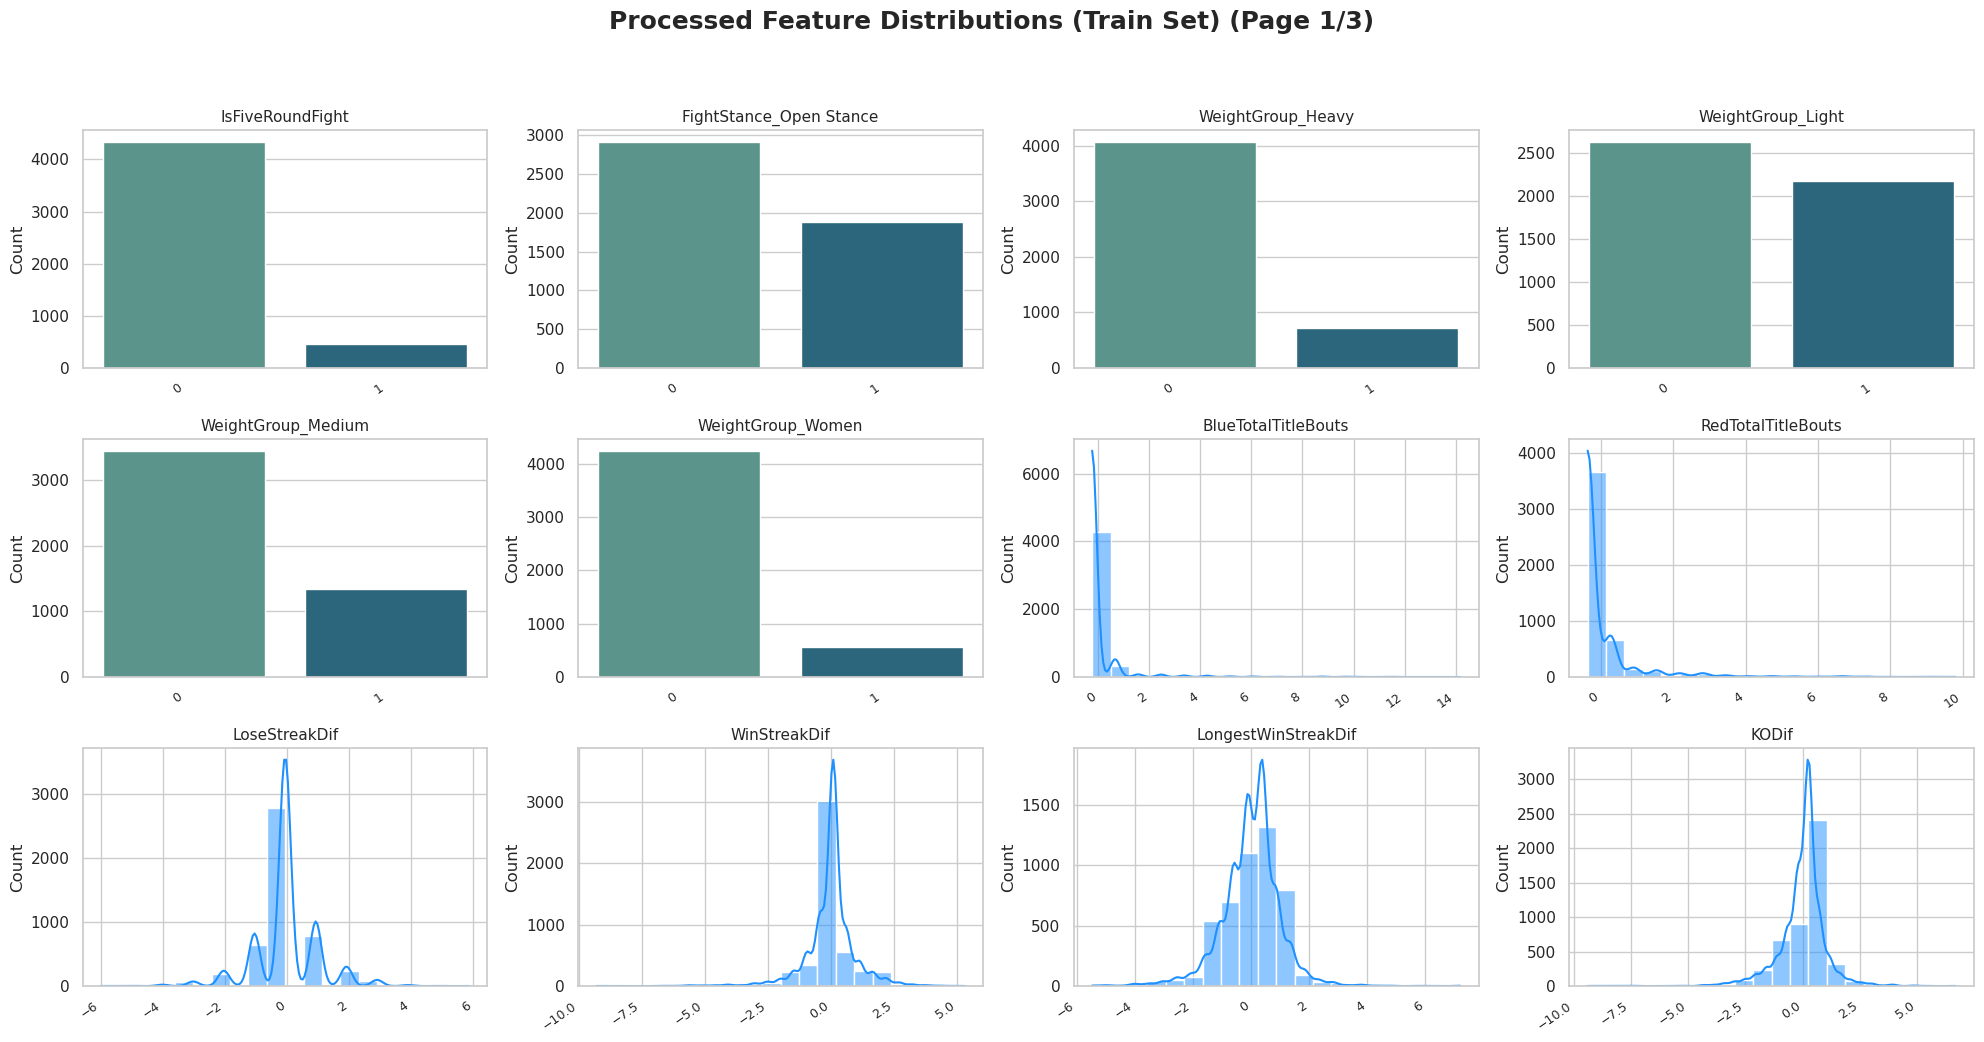

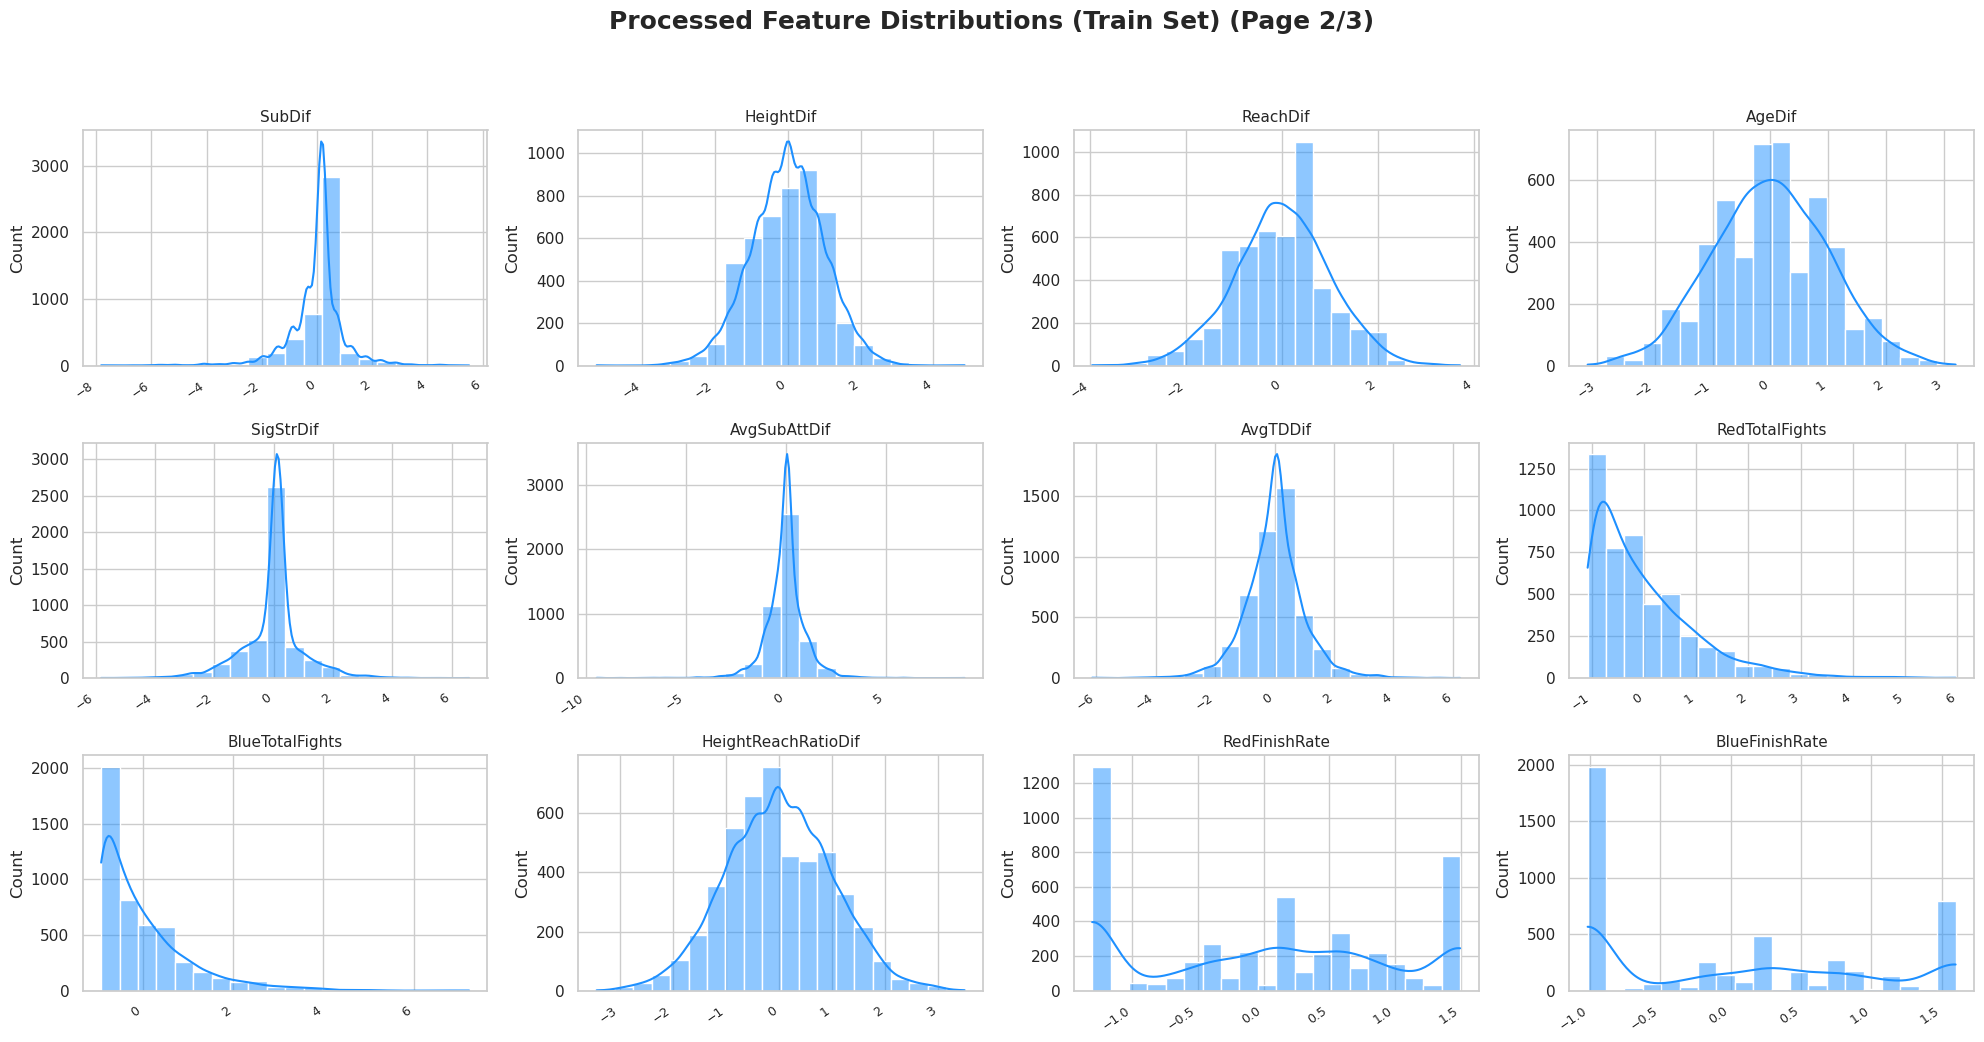

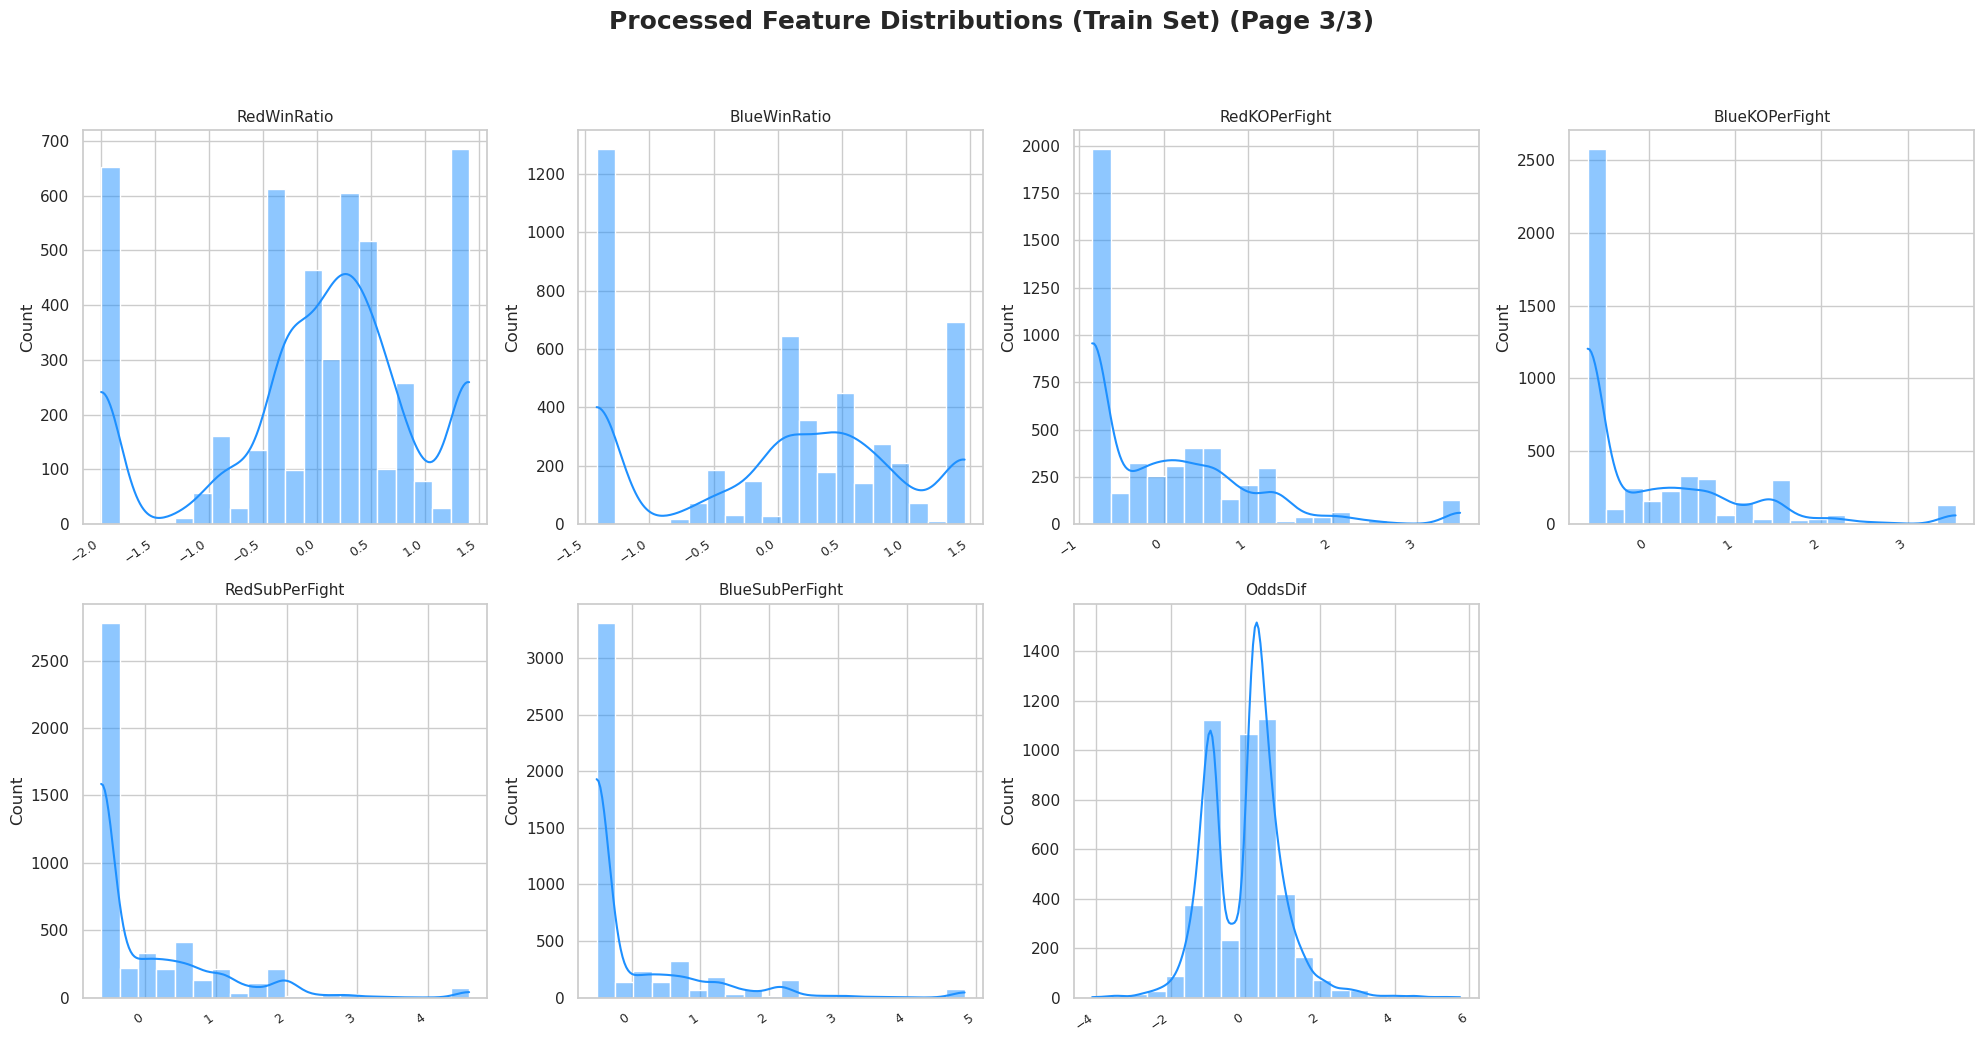

In [14]:
ufc_data.plot_feature_distributions(processed=True)

<div style="text-align: center;">
     <img src="../img/ufc_logo.png" width="800" /> 
</div>